# F&B Data Analysis

In [31]:
# Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime

# Import Yahoo Finance library to get Stock Market Data
import yfinance as yf

In [32]:
# Get stocks from library
fbstocks = yf.Tickers("tsn bmboy bud")
period = "5y"
fbstocks_hist = fbstocks.history(period=period)
# Could also use: fbstocks_hist = fbstocks.history(start="2018-08-07", end="2023-08-07")
fbstocks_hist

# why not do this instead of the other way? we could plot by columns anyway...

[*********************100%***********************]  3 of 3 completed


Close                       Dividends                 High  \
                BMBOY        BUD        TSN     BMBOY  BUD  TSN      BMBOY   
Date                                                                         
2018-08-09   8.076982  92.366821  52.880611       0.0  0.0  0.0   8.076982   
2018-08-10   8.076982  89.328369  53.305775       0.0  0.0  0.0   8.076982   
2018-08-13   7.748397  89.300591  53.040039       0.0  0.0  0.0   7.893416   
2018-08-14   7.748397  90.514107  52.774323       0.0  0.0  0.0   7.748397   
2018-08-15   7.748397  91.134766  53.146336       0.0  0.0  0.0   7.748397   
...               ...        ...        ...       ...  ...  ...        ...   
2023-08-02  20.299999  56.230000  55.410000       0.0  0.0  0.0  20.299999   
2023-08-03  20.299999  56.980000  56.270000       0.0  0.0  0.0  20.299999   
2023-08-04  20.299999  56.490002  56.459999       0.0  0.0  0.0  20.299999   
2023-08-07  20.299999  56.439999  54.299999       0.0  0.0  0.0  20.299999   
2023-08-08        NaN  56.320000  55.049999       NaN  0.0  0.0        NaN   

                                        Low  ...                  Open  \
                  BUD        TSN      BMBOY  ...        TSN      BMBOY   
Date                                         ...                         
2018-08-09  92.950422  53.119770   8.076982  ...  52.517445   8.076982   
2018-08-10  90.458523  53.624653   8.076982  ...  52.703449   8.076982   
2018-08-13  89.606289  53.394346   7.728205  ...  52.800880   7.893416   
2018-08-14  90.875384  53.615804   7.748397  ...  52.623739   7.748397   
2018-08-15  91.273720  53.296915   7.748397  ...  52.570582   7.748397   
...               ...        ...        ...  ...        ...        ...   
2023-08-02  56.320000  55.910000  20.299999  ...  54.799999  20.299999   
2023-08-03  57.459999  56.660000  20.299999  ...  55.130001  20.299999   
2023-08-04  57.279999  57.150002  20.299999  ...  56.360001  20.299999   
2023-08-07  56.639999  54.369999  20.299999  ...  50.099998  20.299999   
2023-08-08  56.404999  55.119999        NaN  ...  53.180099        NaN   

                                 Stock Splits            Volume           \
                  BUD        TSN        BMBOY  BUD  TSN   BMBOY      BUD   
Date                                                                       
2018-08-09  92.653989  52.845180          0.0  0.0  0.0   600.0   639400   
2018-08-10  90.060190  52.721165          0.0  0.0  0.0     0.0  1931100   
2018-08-13  89.504390  53.102043          0.0  0.0  0.0  3100.0  1141600   
2018-08-14  90.634530  53.314641          0.0  0.0  0.0     0.0  1020900   
2018-08-15  89.995353  52.614874          0.0  0.0  0.0     0.0  1077700   
...               ...        ...          ...  ...  ...     ...      ...   
2023-08-02  55.750000  55.000000          0.0  0.0  0.0     0.0  3449500   
2023-08-03  57.459999  55.310001          0.0  0.0  0.0     0.0  4231600   
2023-08-04  56.430000  56.540001          0.0  0.0  0.0   205.0  3166700   
2023-08-07  56.580002  50.880001          0.0  0.0  0.0     0.0  2594300   
2023-08-08  55.980000  53.880001          NaN  0.0  0.0     NaN  2175421   

                      
                 TSN  
Date                  
2018-08-09   3383000  
2018-08-10   2601400  
2018-08-13   2536400  
2018-08-14   3371900  
2018-08-15   2488000  
...              ...  
2023-08-02   2419500  
2023-08-03   3207500  
2023-08-04   3899100  
2023-08-07  10321100  
2023-08-08   4210995  

[1257 rows x 21 columns]

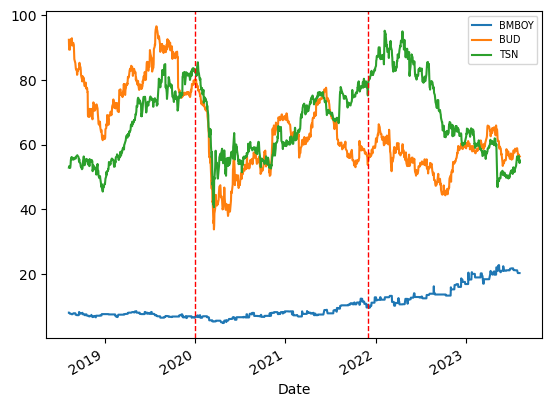

In [37]:
# Date vs Stock Value for each Stock:
bmboy = fbstocks_hist["Close"]["BMBOY"]
bud = fbstocks_hist["Close"]["BUD"]
tsn = fbstocks_hist["Close"]["TSN"]
bmboy.plot()
bud.plot()
tsn.plot()
plt.legend(fontsize=7)
plt.axvline(datetime.datetime(2020, 1, 1), color='red', linewidth=1, linestyle='--')
plt.axvline(datetime.datetime(2021, 12, 1), color='red', linewidth=1, linestyle='--')
plt.show()

# Analysis

# Summary Statistics for Index

# Boxplot and outliers for Index